# Regression Neural Network
This example will look at a neural network that has a linear output.  These are called many things, but the term regression gives a clue how they are used. The neuron or activation function on the output is a linear function.

As always, start by importing many things.  Import the neural network drawing package also


In [1]:
import sklearn.datasets as datasets
import sklearn
import sklearn.neural_network as nn
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random
random.seed(2019) # so I can rerun things
from draw_neural_net import draw_neural_net

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/usr/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In curve fitting, if we knew a function, the software could find function parameters best fitting the data.

In regression neural networks, we don't know the function, and want the network to somehow approximate whatever underlying function is present in the data.

For this example, we will use a function of 3 input variables and one output result.  

In [2]:
def messy(x): # x is a 3 element list
    if x[0]+x[1]+x[2] <= 1e-3:
        return -x[0]+x[1]
    return m.log(x[0]+x[1]+x[2])

Create a training and test set of 1000 random numbers with the variables between -10 and 10. This sets a useable range for the variables.

In [3]:
trainx=[ [random.uniform(-10,10),
        random.uniform(-10,10),
        random.uniform(-10,10)] for x in range(10000)]
testx=[ [random.uniform(-10,10),
        random.uniform(-10,10),
        random.uniform(-10,10)] for x in range(1000)]
print(trainx[:3])

[[6.646048002628447, 5.778581238128988, 8.771357908414306], [-6.788072400521514, 2.9770794882409124, 6.651530808842278], [9.777470278314937, 8.644287847539097, 5.8662468137401405]]


compute the outputs using the 'messy' function defined earlier.

In [4]:
trainy=[messy(x) for x in trainx]
testy = [messy(x) for x in testx]
print(trainy[:3])

[3.0538118783447943, 1.0439934344369348, 3.1899826045891118]


Scale everything from -1 to +1. Scale both the inputs and outputs. (my preference)

In [5]:
# define a min function for cols with rows
def min2(x):
    d2=len(x[0]) # get the size of an entry
    minx=[m.inf for q in range(d2)]
    for r in x:
        for q in range(d2):
            if r[q]<minx[q]:
                minx[q]=r[q]
    return minx
# define a min function for cols with rows
def max2(x):
    d2=len(x[0]) # get the size of an entry
    maxx=[-m.inf for q in range(d2)]
    for r in x:
        for q in range(d2):
            if r[q]>maxx[q]:
                maxx[q]=r[q]
    return maxx
# Find the min and max of trainx
trainmin=min2(trainx)
trainmax=max2(trainx)
# Make the scale factor give 2 (-1 to +1)
trainscale=[(trainmax[q]-trainmin[q])/2 for q in range(len(trainx[0]))]
# A subroutine to scale an x value
def scale2(x,mn,sc):
    rv = [(x[q]-mn[q])/sc[q]-1.0 for q in range(len(x))]
    return rv
# scale the trainx values
Strainx = [scale2(x,trainmin,trainscale) for x in trainx]
#
# Now, do the trainy scaling
#
trainymin=min(trainy)
trainymax=max(trainy)
trainyscale=(trainymax-trainymin)/2
Strainy = [ (x-trainymin)/trainyscale-1.0 for x in trainy]
#
# normalize the test data using the training factors
#
Stestx = [scale2(x,trainmin,trainscale) for x in testx]
Stesty = [ (x-trainymin)/trainyscale-1 for x in testy]

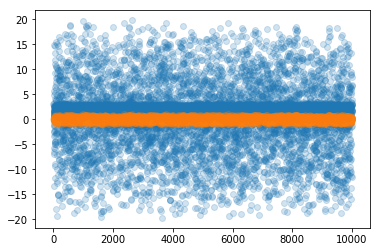

In [6]:
plt.scatter([x for x in range(len(trainy))],trainy,alpha=0.2)
plt.scatter([x for x in range(len(Strainy))],Strainy,alpha=0.2)


It's a strange function, the output is near 1 most of the time. Create a Regressor, and fit to it...

In [7]:
reg = nn.MLPRegressor(hidden_layer_sizes=(6,),
                     max_iter=2000,random_state=4422)

In [8]:
reg.fit(Strainx,Strainy)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=4422,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
reg.score(Stestx,Stesty)

0.6802997728945059

The result is not very good.  1.0 is perfect, 0.0 is an output that doesn't relate, and -93 is terrible...

Plot expected on the X and received on the Y.  A perfect match would be a straight line on the diagonal.

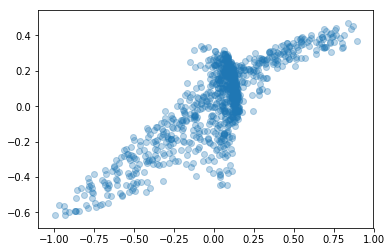

In [10]:
plt.scatter(Stesty,reg.predict(Stestx),alpha=0.3)

Add more hidden layers, and make them bigger use the tanh instead of the rectifier function... add an error tolerance, and play with that also.

In [11]:
def tryit(rstate,layers,maxiter,tolx):
    reg = nn.MLPRegressor(hidden_layer_sizes=layers,
                         max_iter=maxiter,random_state=rstate,
                         activation='tanh',
                         tol=tolx)
    reg.fit(Strainx,Strainy)
    print(reg.score(Stestx,Stesty))
    plt.scatter(Stesty,reg.predict(Stestx),alpha=0.2)
    plt.plot(Stesty,Stesty,'r')

0.9157912946164006


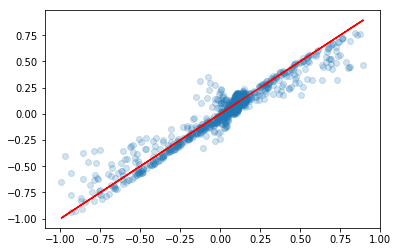

In [12]:
tryit(3422,(60,60,60),20000,1e-3)

Ok on positive values. Add more layers, and see what happens. (Sometimes called a deep neural network)

0.9892452862498977


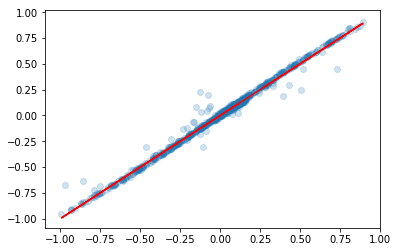

In [13]:
tryit(3422,(60,60,60),20000,1e-5)

0.9787736110652213


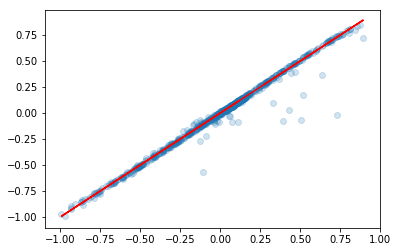

In [14]:
tryit(3422,(60,100,100,60,60,60,60,60),20000,1e-5)

It takes a while to computer the neural network.  Try a lot more layers...

0.9876287508332258


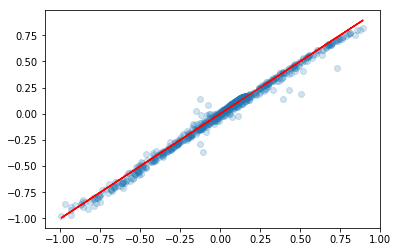

In [15]:
tryit(3422,(60,100,100,80,80,80,70,70,70,60,60,60,60,60),
      20000,1e-5)

Didn't get much better.  Feels like overfitting.